# ECS7024 Coursework 4 Submission - Huy Quang Pham 
# Additional Analysis of the Storks Data

**Table of Content**
1. Section 1: Introduction and outline
    1. Introduction and Outline
    1. Loading the data
1. Section 2: Analysis 1 - Models explaining the variability of number of birth 
    1. Two regression models based on current data
    1. Estimating the difference between the $R^2$ of the two models using bootstrap method to resample data 
1. Section 3: Analysis 2: Models explaining the variability of number of storks 
    1. Part 3.1: Two regression models based on current data
    1. Part 3.2: Estimating the difference between the Root Mean Squared Error of the two models using bootstrap method to resample data

In [1]:
# Importing a few packages that are expected to be used
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#%matplotlib inline
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

%cd "C:\\Users\\Huy's\\OneDrive\\qmul_2021-22\\statistics_foundation\\coursework\\cw4"

C:\Users\Huy's\OneDrive\qmul_2021-22\statistics_foundation\coursework\cw4


## Section 1: Introduction and Outline
This notebook details the analysis process of the statistical significance of a particular statistic of two given models, based on the Storks data and instructions outlined in the coursework requirement. The detailed models and model statistic in use is further specified below. 

### Section 1.A: Outline
Analysis 1 will be discussed in Section 2, where 2 models using number of storks and population size as the respective predictors for the number of births is implemented. These models will first use the original data, and then the bootstrap will be used to get a distribution of $R^2$ values, which will be used to determine whether we can be confident that one of the models explains more of the variability than the other model.  

Analysis 2 will be discussed in Section 3, where 2 models using (i) land area and (ii) population density and area of suitable land as respective predictors for the number of storks is implemented. These models will first use the original data, and then the bootstrap will be used to get a distribution of Root Mean Squared Error values, which will be used to determine whether we can be confident that one of the models predicts the number of storks better than the other model.  

### Section 1.B: Loading the data
Data from source tables will be defaultly imported.

In [2]:
df = pd.read_csv("storks.csv")

print('General information and first 10 lines of data of the file:\n')
display(df.info())
display(df)

General information and first 10 lines of data of the file:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              17 non-null     object 
 1   Area                 17 non-null     int64  
 2   Storks               17 non-null     int64  
 3   Humans               17 non-null     float64
 4   BirthRate            17 non-null     int64  
 5   SuitableAreaPercent  17 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 944.0+ bytes


None

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


According to the Storks deliver Babies paper, the `Area` are displayed in $km^2$,  `Storks` are displayed in pairs, `Humans` in millions and `BirthRate` in thousands per year.

## Section 2: Analysis 1 - Models explaining the variability of number of birth 

### Section 2.A: Regression models based on current data

This analysis looks at 2 regression models: Model 1 uses number of stork pairs as the predictor variable and Birth rate as the dependent variable; model 2 uses population size of humans as the predictor variable and Birth rate as the dependent variable.

2 scatter plot will be drawn to examine the relationship between Storks number and Birth number, as well as between Population size and Birth number.

<AxesSubplot:xlabel='Humans', ylabel='BirthRate'>

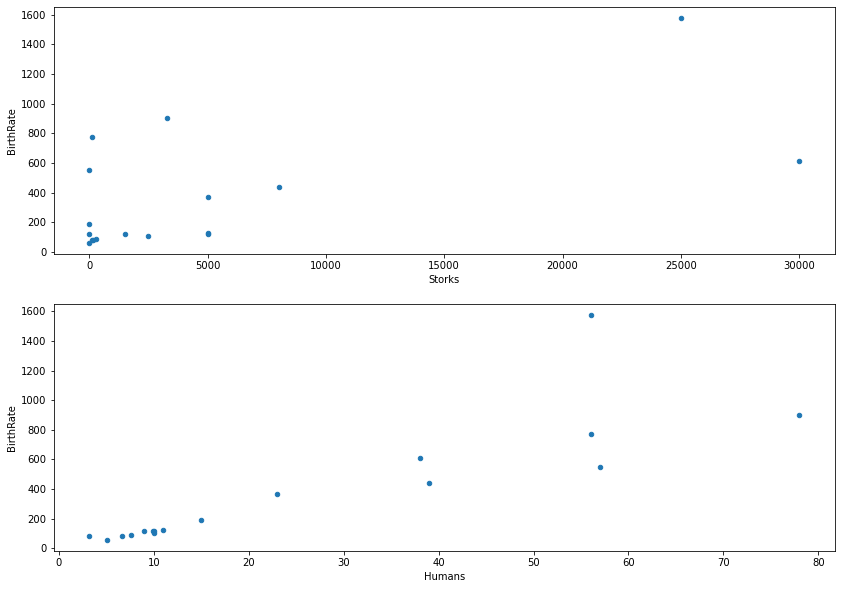

In [3]:
fig, (a1,a2) = plt.subplots(2, 1, figsize=(14,10))
#plt.scatter(y = hearts.MaxRate, x= hearts.Age, ax=a1)
df.plot(kind='scatter',  x='Storks', y='BirthRate', ax=a1)
df.plot(kind='scatter',  x='Humans', y='BirthRate', ax=a2)

Based on the scatter plot, the relationship between Human population and Birth Rate is more visibly linear compared to that between Storks and Birth Rate. This will be confirmed by running 2 linear regression models.

In [4]:
#set y values for both models
y_Birth = df.BirthRate 
#set x values for Model 1 
X_Storks = np.array(df.Storks).reshape(-1, 1)
#set x values for Model 2
X_Humans = np.array(df.Humans).reshape(-1, 1)

In [5]:
#Fitting Model 1
reg_Storks = LinearRegression().fit(X_Storks, y_Birth)
print('The R2 coefficient of determination for Model 1 is %4.3f' % reg_Storks.score(X_Storks, y_Birth))
print('The intercept is %4.1f' % reg_Storks.intercept_)
beta_Storks = reg_Storks.coef_
print('Estimated regression coefficient for Storks is %4.2f' % (beta_Storks*1000), 
      'change of babies born each year per pair of Storks.')


The R2 coefficient of determination for Model 1 is 0.385
The intercept is 225.0
Estimated regression coefficient for Storks is 28.79 change of babies born each year per pair of Storks.


In [6]:
reg_Humans = LinearRegression().fit(X_Humans, y_Birth)
print('The R2 coefficient of determination for Model 2 is %4.3f' % reg_Humans.score(X_Humans, y_Birth))
print('The intercept is %4.1f' % reg_Humans.intercept_)
beta_Humans = reg_Humans.coef_
print('Estimated regression coefficient for Storks is %4.2f' % (beta_Humans), 
      'change of babies born each year per thousand of human population.')

The R2 coefficient of determination for Model 2 is 0.725
The intercept is -8.4
Estimated regression coefficient for Storks is 14.83 change of babies born each year per thousand of human population.


The results confirms that Human population explains the variability of Birth Rate in each country better than the number of Stork pairs, as Model 2's R squared is almost double that of Model 1.

It can also be noted that the coefficient for the predictor variable in both model are positive in value, meaning there are positive relationships between birth rate and both number of stork pairs and human population. 

The predictions by both regressions are visualized below:

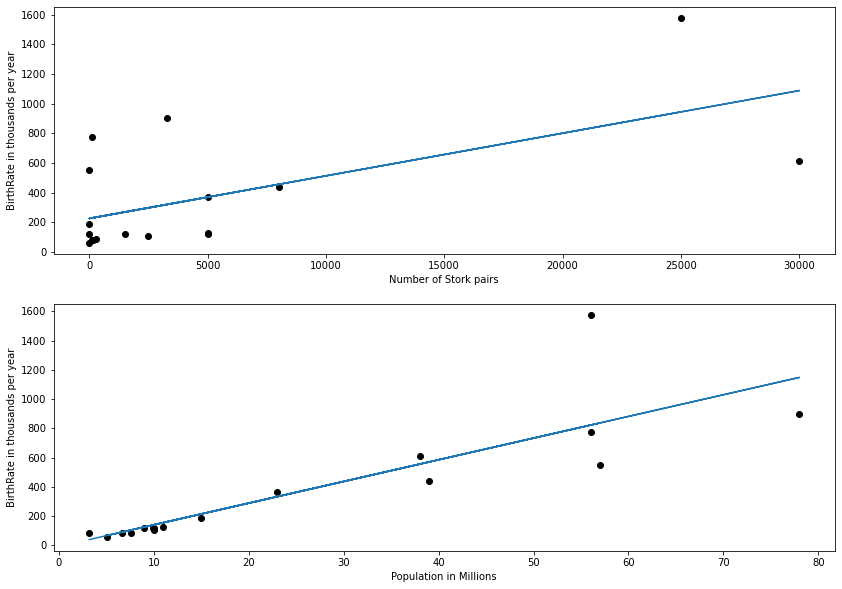

In [7]:
#get predicted value of Birth rate using Model 1 
y_hat_Storks = reg_Storks.predict(X_Storks)
#get predicted value of Birth rate using Model 2
y_hat_Humans = reg_Humans.predict(X_Humans)

#plot
fig, (a1,a2) = plt.subplots(2, 1, figsize=(14,10))

a1.scatter(X_Storks, y_Birth,  color='black')
a1.plot(X_Storks, y_hat_Storks)
a1.set_ylabel('BirthRate in thousands per year')
a1.set_xlabel('Number of Stork pairs')

a2.scatter(X_Humans, y_Birth,  color='black')
a2.plot(X_Humans, y_hat_Humans)
a2.set_ylabel('BirthRate in thousands per year')
_ = a2.set_xlabel('Population in Millions')


### Section 2.B: Bootstrap

Bootstrap method will be conducted to estimate the confidence interval of the difference of Model 1's R-squared and Model 2's R-squared. As we are looking to confirm whether one of the models explains more variability than the other, and the original data shows that Model 2 has a higher R-squared than model 1, the confidence interval will be set from 0 quantile to $(1-\alpha)$ quantile. Confidence interval of 90% ($\alpha = 0.1$) and 95% ($\alpha = 0.05$) will be specified.

First the bootstrap function to calculate $R^2_{Model 1} - R^2_{Model 2}$ will be created:

In [8]:
#Create a general bootstrap function using sklearn's resample
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

#Create a general function to get the difference between a statistic of 2 regression models 
def get_difference(stat, X1, X2, y1, y2=None):
    """
    Returns the difference of the specified statistics between 
    a model using X1 and y1 vs a model using X2 and y2 (or y1 if y2 is not specified)
    
    """
    #conditions to accommodate models with a single predictor vs multiple predictors
    if len(X1.shape)==1:
        X1_transposed = np.array(X1).reshape(-1, 1)
    else:
        X1_transposed = np.column_stack(([X1[i] for i in list(X2)]))
    if len(X2.shape)==1:
        X2_transposed = np.array(X2).reshape(-1, 1)
    else:
        X2_transposed = np.column_stack(([X2[i] for i in list(X2)]))
    #conditions to accommodate the optional use of different dependent variables between the 2 models
    if y2==None:
        diff = stat(X1_transposed, y1) - stat(X2_transposed, y1)
    else:
        diff = stat(X1_transposed, y1) - stat(X2_transposed, y2)
    
    return diff

In [9]:
#Create a general function to calculate R-squared statistic of a regression model 
def Regression_get_Rsquared(X, y):
    """Returns R Squared of a Linear Regression Model between X and y"""
    reg = LinearRegression().fit(X, y)
    return reg.score(X, y)

#Create a specific function to calculate difference in R-squared of model 1 and model 2
def Rsquared_Storks_v_Humans(df):
    """Returns the difference of R Squared between 
    model using Storks vs a model using Humans as explanatory variable"""
    diff = get_difference(Regression_get_Rsquared, df.Storks, df.Humans, df.BirthRate)
    return diff

The output is 1000 bootstrap estimates of $R^2_{Model 1} - R^2_{Model 2}$. This will be plotted in a histogram for further investigation:

array([[<AxesSubplot:title={'center':'R_squared_diff'}>]], dtype=object)

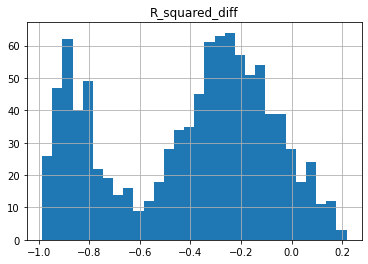

In [10]:
#Run bootstrap function using the specific function just created, results saved in bstrap
bstrap = bootstrapC(df, ['R_squared_diff'], 1000, Rsquared_Storks_v_Humans) 

bstrap.hist(bins=30)

Most bootstrapped estimates fall below 0. 95% and 90% confidence interval ranges (excluding tail only) is specified:

In [11]:
print('95%% range is %4.3f to %4.3f' % 
      (bstrap.R_squared_diff.quantile(0), bstrap.R_squared_diff.quantile(0.95)))
print('90%% range is %4.3f to %4.3f' % 
      (bstrap.R_squared_diff.quantile(0), bstrap.R_squared_diff.quantile(0.90)))

95% range is -0.986 to 0.056
90% range is -0.986 to -0.026


It is clear that all values within the 90% confidence interval are less than 0, however not all values within the 95% confidence interval are less than 0.

Therefore it can be concluded with 90% confidence (but not 95%) that the R-squared of Model 2 is greater than that of model 1, meaning the human population have more explanatory power to Birth rate than the Stork population.

## Section 3: Analysis 2 - Models explaining the variability of number of Stork pairs

### Section 3.A: Regression using current data

This analysis looks at 2 regression models: Model 1 uses country's land areaas the predictor variable and number of Stork pairs as the dependent variable; model 2 uses human population density and land area suitable for storks as the predictor variable and number of Stork pairs as the dependent variable.

Model 2's predictors require further data transformation:

In [12]:
#calculating Human density based on population size and land Area
df['HumanDensity'] = df.apply(lambda x: x.Humans*1000000/x.Area, axis=1)
#calculating Human density based on Suitable area percent and land Area
df['StorkArea'] = df.apply(lambda x: x.Area*(x.SuitableAreaPercent/100), axis=1)
#display newly created columns for eyeball checks
df

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,HumanDensity,StorkArea
0,Albania,28750,100,3.2,83,55.68,111.304348,16008.000
1,Austria,83860,300,7.6,87,38.34,90.627236,32151.924
2,Belgium,30520,1,9.9,118,65.93,324.377457,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,81.081081,64368.900
4,Denmark,43100,9,5.1,59,81.46,118.329466,35109.260
5,France,544000,140,56.0,774,58.47,102.941176,318076.800
6,Germany,357000,3300,78.0,901,59.81,218.487395,213521.700
7,Greece,132000,2500,10.0,106,47.31,75.757576,62449.200
8,Holland,41900,4,15.0,188,70.96,357.995227,29732.240
9,Hungary,93000,5000,11.0,124,75.86,118.279570,70549.800


The 2 regression models will be fitted:

In [13]:
#target variable
y_Storks = df.Storks
#Model 1's predictor
X_Area = np.array(df.Area).reshape(-1, 1)
#Model 2's predictors
X_Den_SArea = np.column_stack((df.HumanDensity, df.StorkArea))

In [14]:
#Model 1
reg_Area = LinearRegression().fit(X_Area, y_Storks)
print('The R2 coefficient of determination is %4.3f' % reg_Area.score(X_Area, y_Storks))
print('The intercept is %4.1f' % reg_Area.intercept_)
beta_Area = reg_Area.coef_
print('Estimated regression coefficient for Area is %4.2f' % (beta_Area), 
      'change of Stork pair per square km.')
y_hat_Area = reg_Area.predict(X_Area)
print('Root of the mean squared error: %.2f'% mean_squared_error(y_Storks, y_hat_Area, squared=False))

The R2 coefficient of determination is 0.336
The intercept is -60.7
Estimated regression coefficient for Area is 0.02 change of Stork pair per square km.
Root of the mean squared error: 6984.77


In [15]:
#Model 2 
reg_Den_SArea = LinearRegression().fit(X_Den_SArea, y_Storks)
print('The R2 coefficient of determination is %4.3f' % reg_Den_SArea.score(X_Den_SArea, y_Storks))
print('The intercept is %4.1f' % reg_Den_SArea.intercept_)
beta_Density, beta_StorkArea = reg_Den_SArea.coef_
print('Estimated regression coefficient for Population density is %4.2f' % (beta_Density), 
      'change of Stork pair for an increase of 1 person per square km.')
print('Estimated regression coefficient for StorkArea is %4.2f' % (beta_StorkArea), 
      'change of Stork pair per square km of suitable area.')
y_hat_Den_SArea = reg_Den_SArea.predict(X_Den_SArea)
print('Root of the mean squared error: %.2f'% mean_squared_error(y_Storks, y_hat_Den_SArea, squared=False))

The R2 coefficient of determination is 0.393
The intercept is 1881.4
Estimated regression coefficient for Population density is -12.13 change of Stork pair for an increase of 1 person per square km.
Estimated regression coefficient for StorkArea is 0.04 change of Stork pair per square km of suitable area.
Root of the mean squared error: 6677.03


The results confirms that population density and land area suitable for storks explains the variability of the numebr of stork pairs in each country better than the land area itself, as Model 2's R squared is higher than that of Model 1.

It can also be noted that the root mean squared error of Model 1 is higher than that of Model 2, meaning Model 1 gets a higher error than Model 2 while predicting the same variable.

The predictions by both regressions are visualized below:

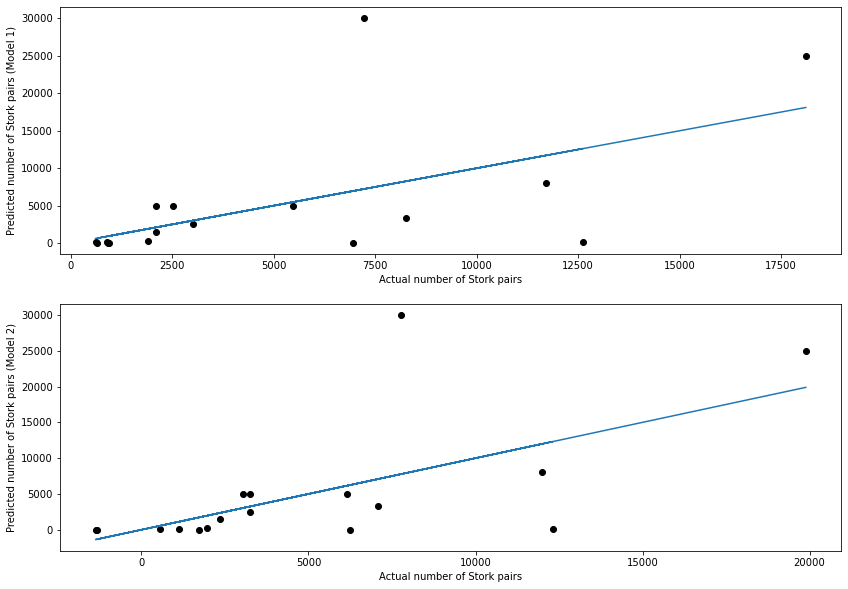

In [16]:
#plot
fig, (a1,a2) = plt.subplots(2, 1, figsize=(14,10))

a1.scatter(y_hat_Area, y_Storks,  color='black')
a1.plot(y_hat_Area, y_hat_Area)
a1.set_ylabel('Predicted number of Stork pairs (Model 1)')
a1.set_xlabel('Actual number of Stork pairs')

a2.scatter(y_hat_Den_SArea, y_Storks,  color='black')
a2.plot(y_hat_Den_SArea, y_hat_Den_SArea)
a2.set_ylabel('Predicted number of Stork pairs (Model 2)')
_ = a2.set_xlabel('Actual number of Stork pairs')


### Section 3.B: Bootstrap

Bootstrap method will be conducted to estimate the confidence interval of the difference of Model 1's root mean squared error (RMSE) and Model 2's RMSE. As we are looking to confirm whether one of the models predicts than the other, and the original data shows that Model 1 has a higher RSME than model 1, the confidence interval will be set from $\alpha$ quantile to 100 quantile. Confidence interval of 95% ($\alpha = 0.1$) and 99% ($\alpha = 0.05$) will be specified.

First the bootstrap function to calculate $RSME_{Model 1} - RSME_{Model 2}$ will be created:

In [17]:
#Create a general function that calculates model's RMSE
def Regression_get_RMSE(X, y):
    """Returns RMSE of a Linear Regression Model between X and y"""
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X)
    return mean_squared_error(y, y_hat, squared=False)

#Create a specific funtion that calculates the difference between 2 models' RSME 
#(reusing get_difference function)
def RSME_Area_v_Den_SArea(df):
    """Returns the difference of RSME between 
    model using Area vs a model using Density and Stork suitable Area as explanatory variable"""
    diff = get_difference(Regression_get_RMSE, df.Area, df.loc[:,['HumanDensity', 'StorkArea']], df.Storks)
    return diff


The output is 1000 bootstrap estimates of $RMSE^2_{Model 1} - RMSE_{Model 2}$. This will be plotted in a histogram for further investigation:

array([[<AxesSubplot:title={'center':'RSME_diff'}>]], dtype=object)

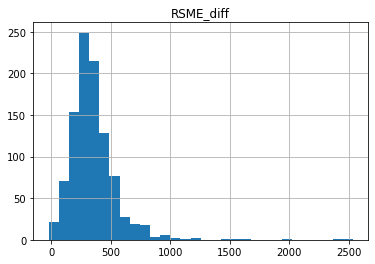

In [18]:
#Calculate 1000 bootstraped estimates of the difference between 2 models' RSME 
bstrap_Stork = bootstrapC(df, ['RSME_diff'], 1000, RSME_Area_v_Den_SArea) 
bstrap_Stork.hist(bins = 30)

Most bootstrapped estimates fall above 0. 99% and 95% confidence interval ranges (excluding left tail only) is specified:

In [19]:
print('99%% range is %4.3f to %4.3f' % 
      (bstrap_Stork.RSME_diff.quantile(0.01), bstrap_Stork.RSME_diff.quantile(1)))
print('95%% range is %4.3f to %4.3f' % 
      (bstrap_Stork.RSME_diff.quantile(0.05), bstrap_Stork.RSME_diff.quantile(1)))

99% range is 38.003 to 2535.201
95% range is 112.524 to 2535.201


It is clear that all values within the 99% confidence interval are over 0.

Therefore it can be concluded with 99% confidence that the RSME of Model 1 is greater than that of model 2, meaning the model using population density and land area suitable for storks predicts the number of stork pairs in a country better than the model using land area predicting the same variable.